<a href="https://colab.research.google.com/github/sanchi285/PyTorch-for-Deep-Learning-Machine-Learning-/blob/main/TensorFlowWorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu118'

In [5]:
#create known paremeters
weight = 0.7
bais = 0.3

#create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bais

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
#split data into train and test
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(Y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
def plot_predictions(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    prediction=None
                   ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c="b", s=7, label="training_data")
    plt.scatter(test_data,test_labels, c="g", s=7, label="testing_data")
    if prediction is not None:
      plt.scatter(test_data,prediction, c="r",s=7,label="prediction")
    plt.legend(prop={"size": 14})


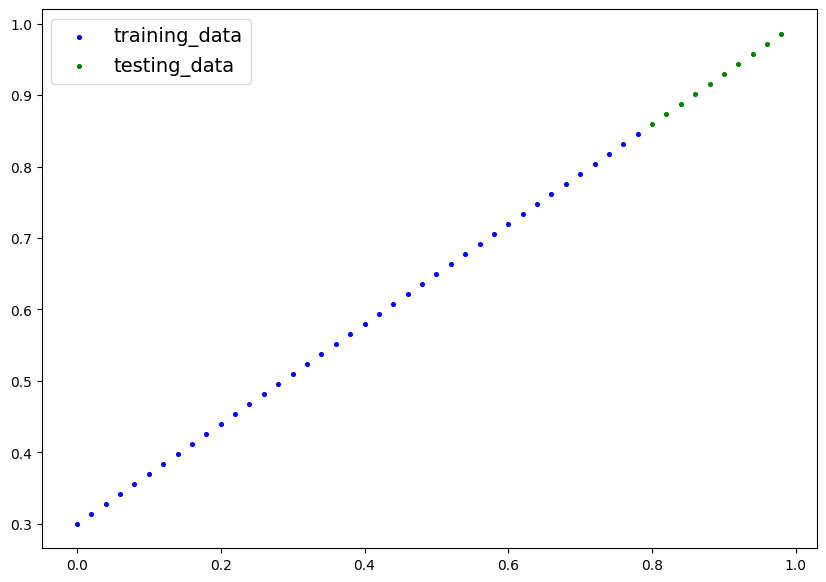

In [9]:
plot_predictions()

In [16]:
#Create a linear regrassion model
class LinearRegrassionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float))
    self.bias    = nn.Parameter(torch.randn(1,dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

In [17]:
torch.manual_seed(42)
model_0 =  LinearRegrassionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

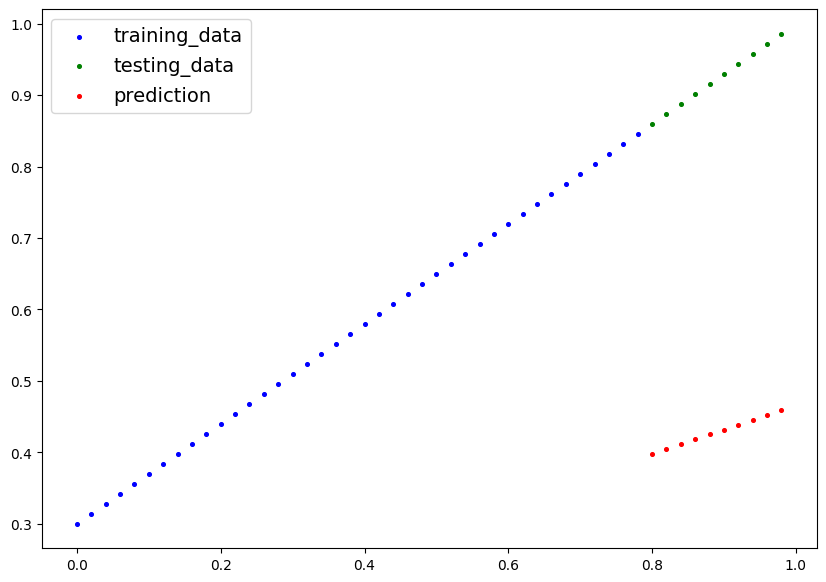

In [21]:
plot_predictions(prediction=y_preds)

In [24]:
#train the model
#loss function
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [38]:
torch.manual_seed(42)
epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train() #put the model into training mode
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred,Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval() #put the model into evaluationmode
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test.type(torch.float))
    if epoch%10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

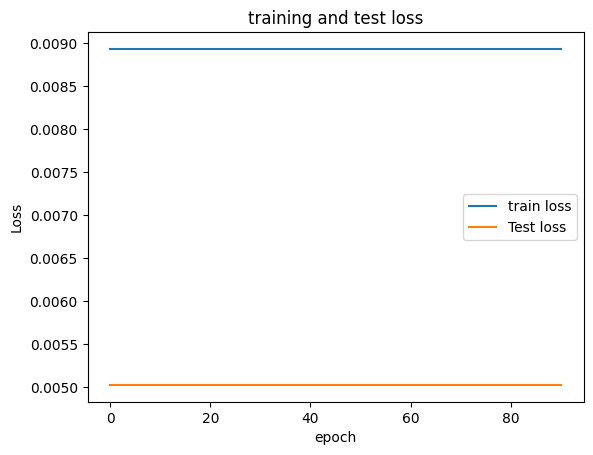

In [39]:
plt.plot(epoch_count, train_loss_values,label="train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()

In [40]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
